# Seaborn
Seaborn like Matplotlib is also a library for visualization. In matplotlib we have to write multiple lines of code to create a plot. On the otherhand seaborn makes assumption on what we want which often leads to getting the same plot with just one line of code. Generally matplot is used when we need a lot of control for our plots.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline # for the graph to be shown in jupyter notebook
%reload_ext autoreload # for automatic reloading
%autoreload 2

UsageError: unrecognized arguments: # for the graph to be shown in jupyter notebook


# Importing Data

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [6]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Distribution Plot

c:\users\sunka\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

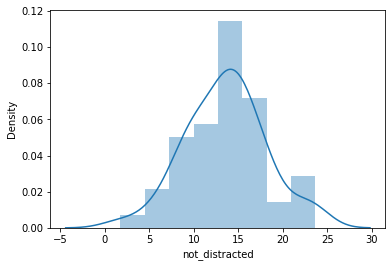

In [8]:
sns.distplot(crash_df['not_distracted'])

<AxesSubplot:xlabel='not_distracted'>

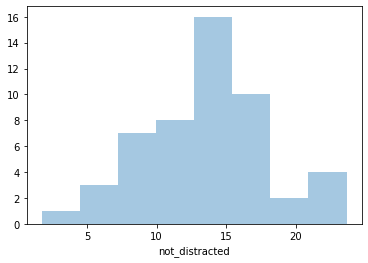

In [10]:
sns.distplot(crash_df['not_distracted'], kde = False )# bins =25

# Joint Plot

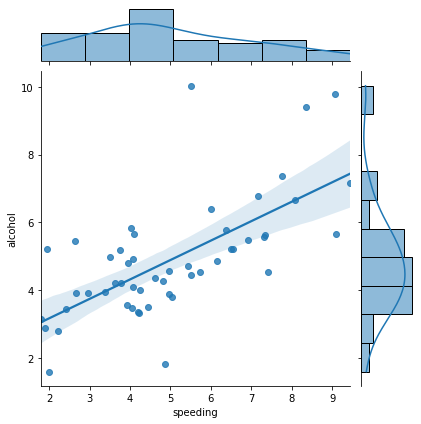

In [11]:
#to compare two distributions
sns.jointplot(x= 'speeding', y = 'alcohol' , data = crash_df, kind='reg')

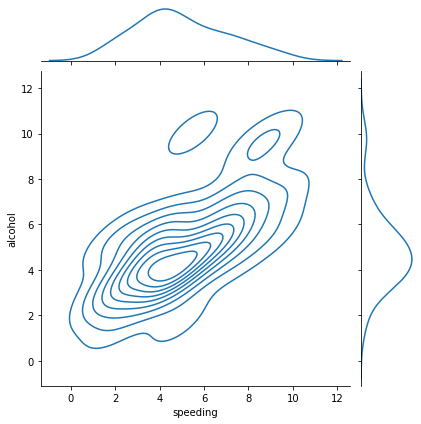

In [12]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde') #kernel density estimation  

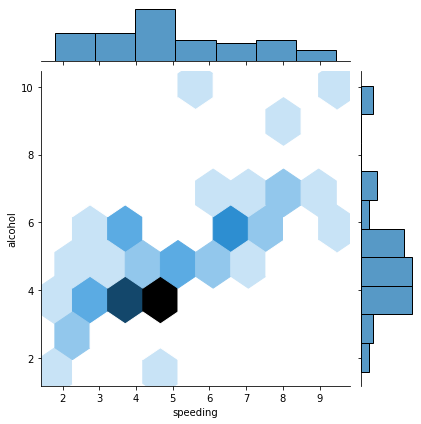

In [13]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind = 'hex')

# KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

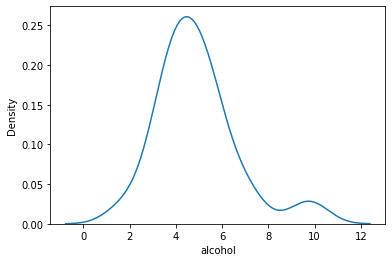

In [15]:
sns.kdeplot(crash_df['alcohol'])

# Pair Plot

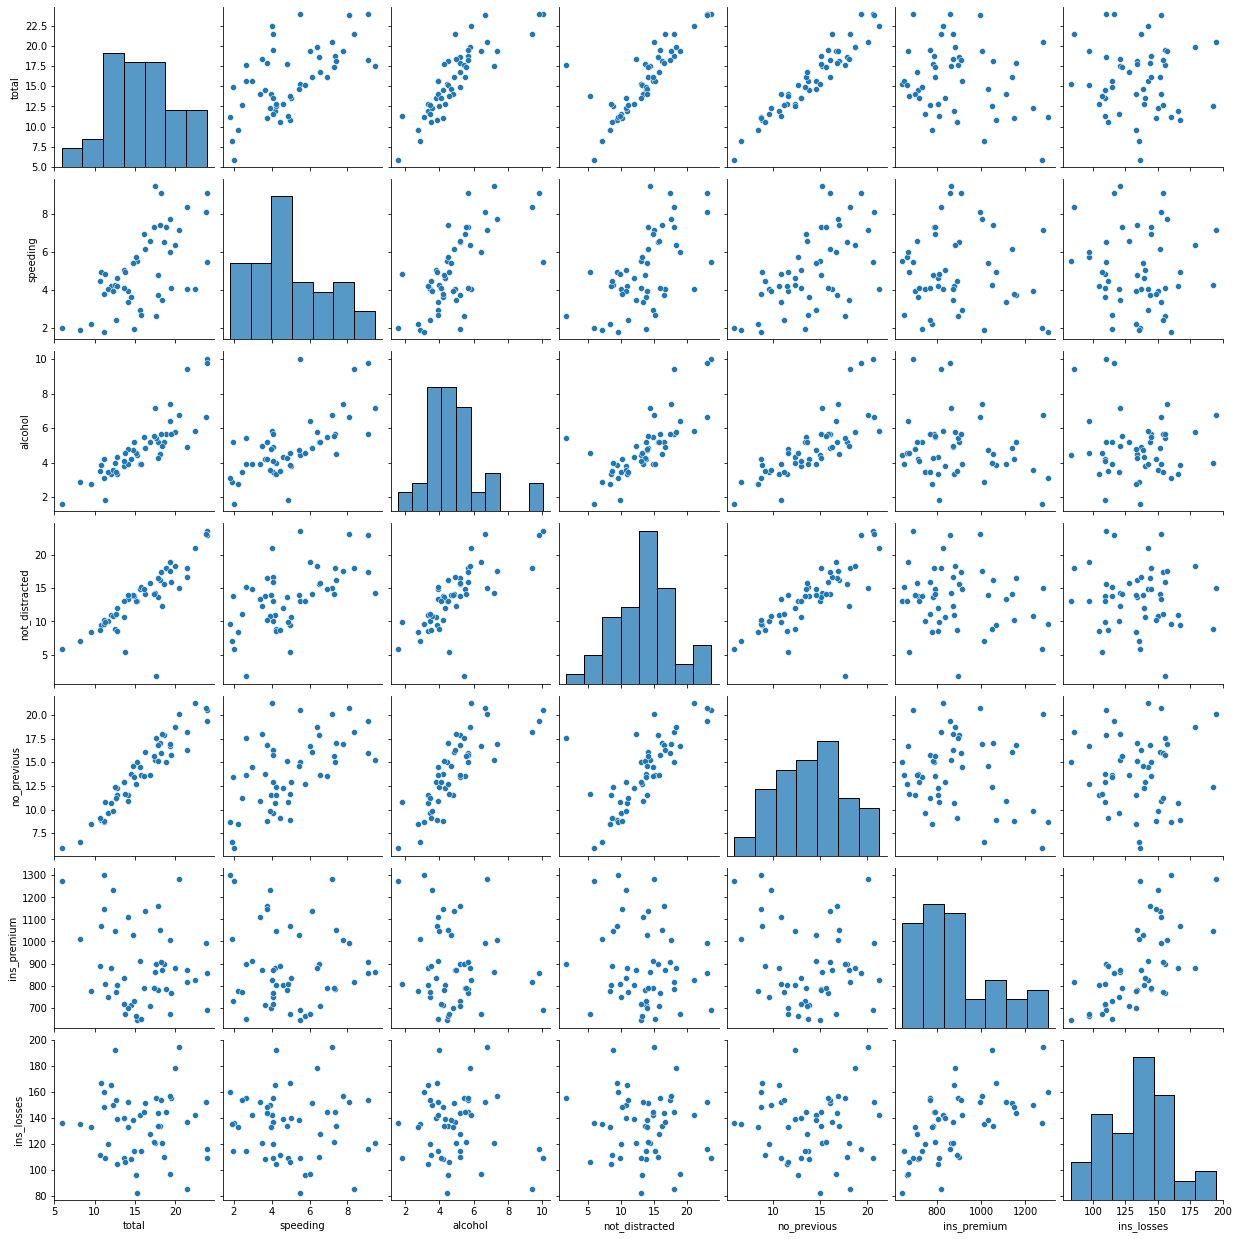

In [16]:
# pair plot is going to plot relationship across the entire dataframe numerical values
sns.pairplot(crash_df)

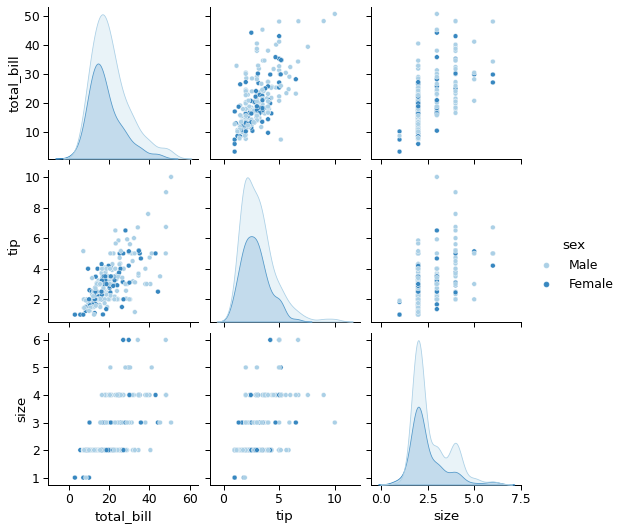

In [57]:
tips_df = sns.load_dataset('tips')
sns.pairplot(tips_df, hue = 'sex', palette ='Blues')  #hue for categorical data

# Rug Plot

<AxesSubplot:xlabel='tip'>

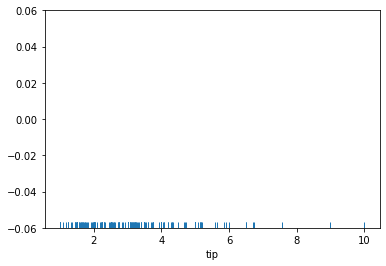

In [19]:
sns.rugplot(tips_df['tip'])  #dense where the tips are more common

# Styling

<Figure size 576x288 with 0 Axes>

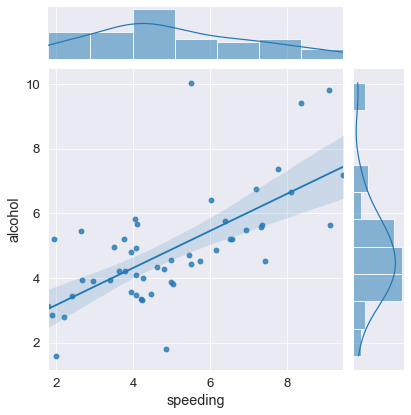

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.set_context('paper', font_scale=1.5)
#sns.despine(left=False)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')


# Categorical Plots

# Bar Plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

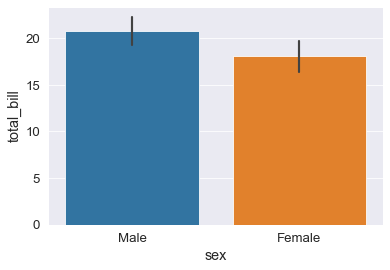

In [30]:
sns.barplot(x='sex', y='total_bill', data=tips_df) #default estimator=mean

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

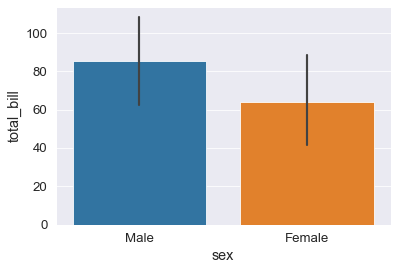

In [33]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)  #estimator = np.median, np.var, np.std

# Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

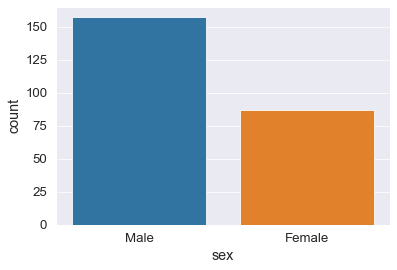

In [35]:
sns.countplot(x='sex', data=tips_df) #shift+Tab

# Box Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

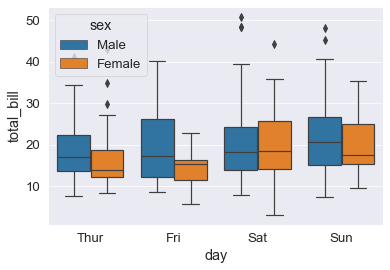

In [38]:
#allows us to compare different variables
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')

# Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

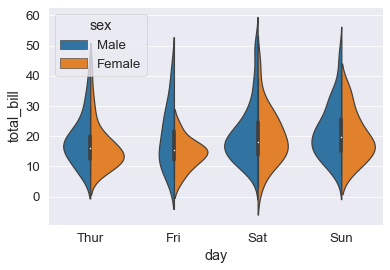

In [42]:
#combination of box plot and kde plot
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

# Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

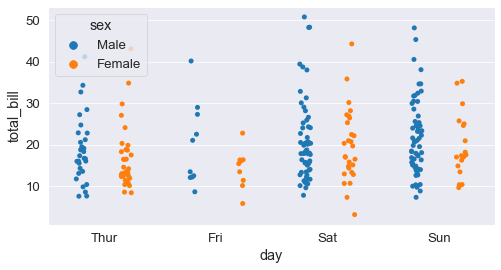

In [47]:
plt.figure(figsize=(8,4))
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True) #jitter for non overlapping, odge for men and women


# Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

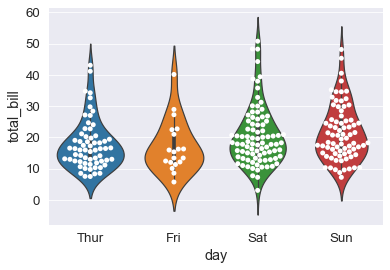

In [51]:
#helps us to plot on top of another plot
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

# Pallets

<AxesSubplot:xlabel='day', ylabel='total_bill'>

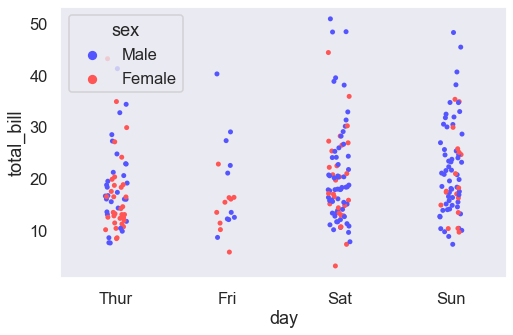

In [55]:
plt.figure(figsize=(8,5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='seismic')
#https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

# Matrix Plot

# Heatmaps

In [8]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Figure size 576x432 with 0 Axes>

In [12]:
#Option 1
crash_mx = crash_df.corr()
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

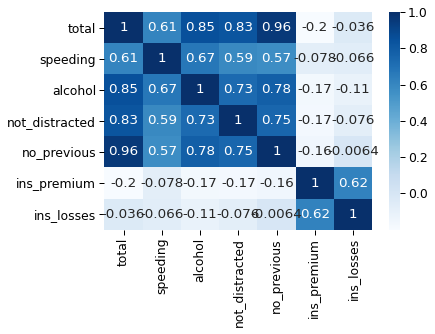

In [16]:
sns.heatmap(crash_mx, annot = True, cmap='Blues')

In [19]:
#Option 2
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [26]:
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

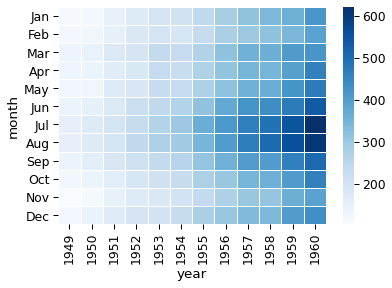

In [32]:
sns.heatmap(flights, cmap='Blues' ,linecolor='white', linewidth=1)

# Cluster Map

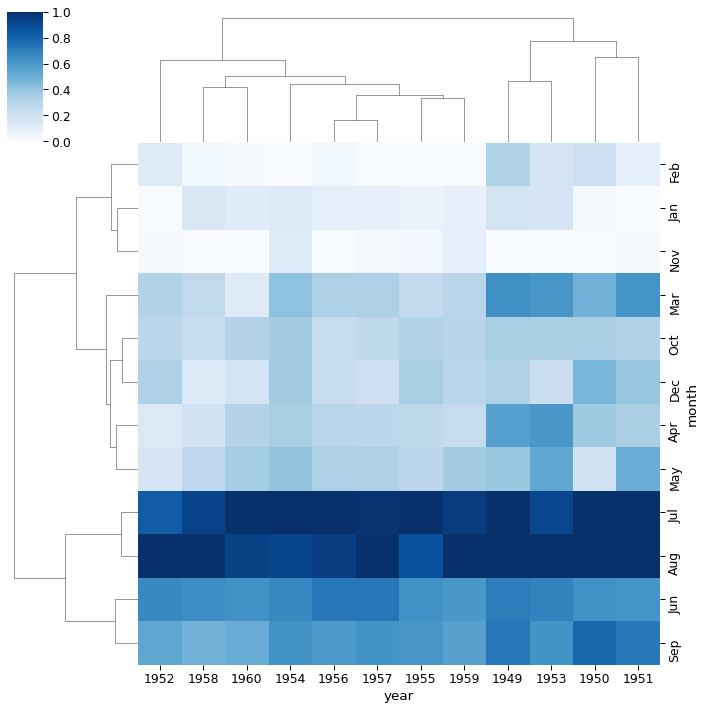

In [34]:
sns.clustermap(flights, cmap='Blues', standard_scale=1) #standard scale is for normalizing the data. Note: the years are no longer in order


# Pair Grid

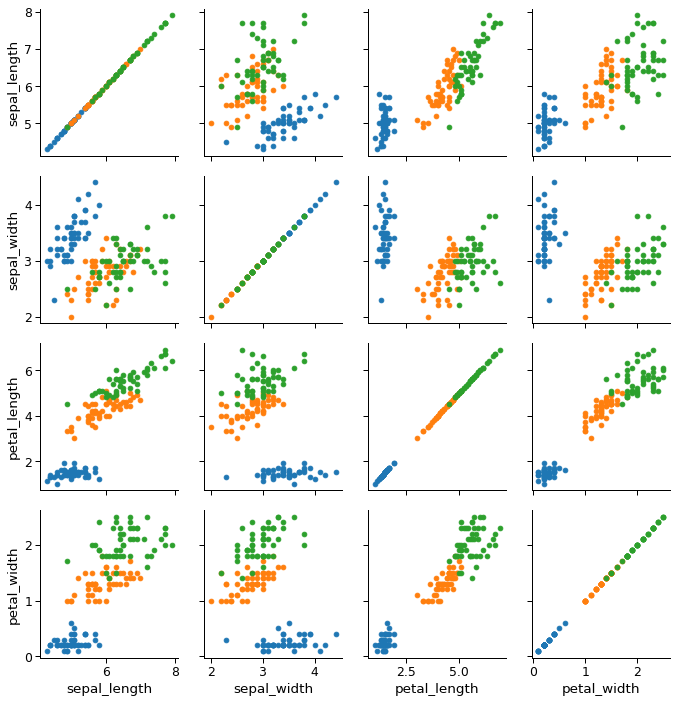

In [40]:
iris = sns.load_dataset('iris')

iris_g = sns.PairGrid(iris, hue='species')
iris_g.map(plt.scatter)

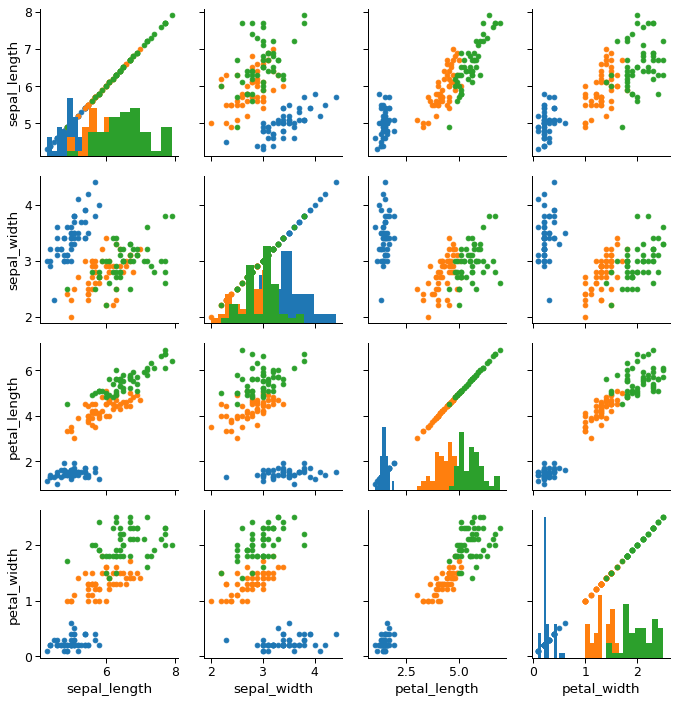

In [41]:
iris_g.map_diag(plt.hist)

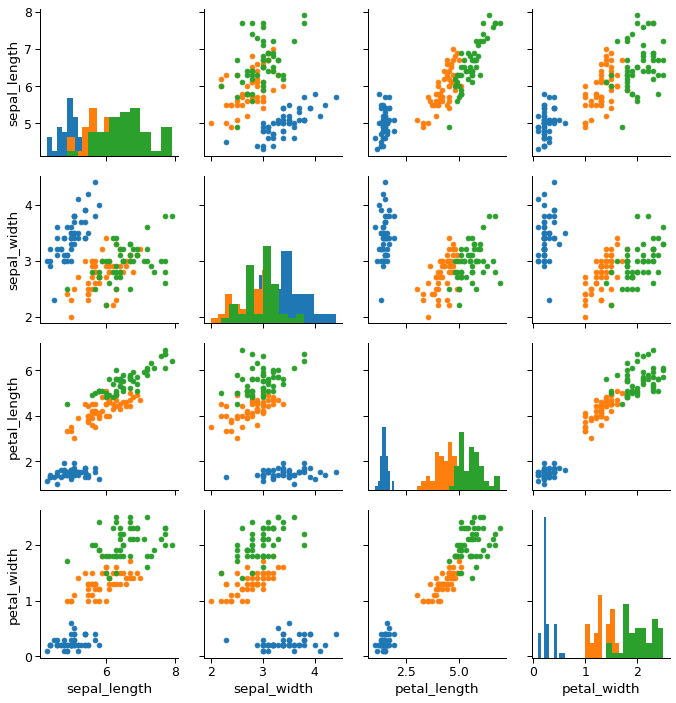

In [44]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)

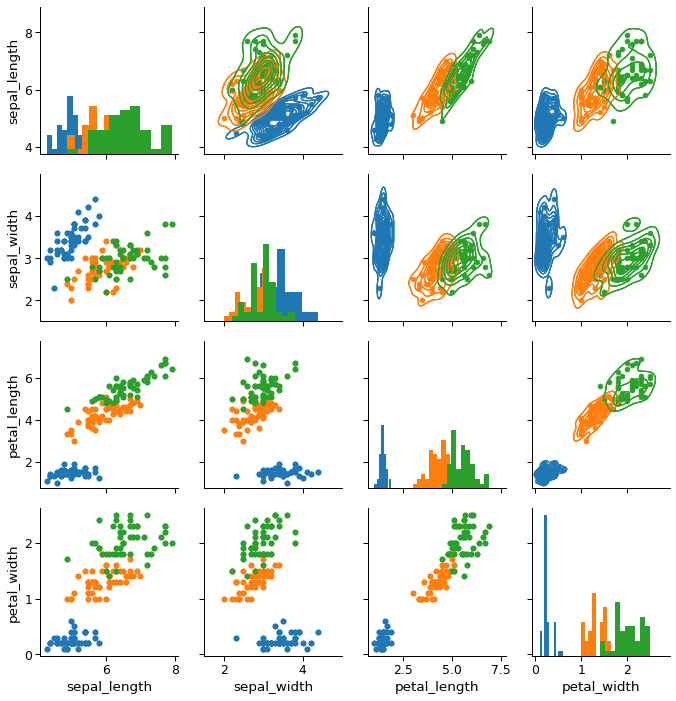

In [48]:
iris_g.map_diag(plt.hist)
iris_g.map_upper(sns.kdeplot)
iris_g.map_lower(plt.scatter)

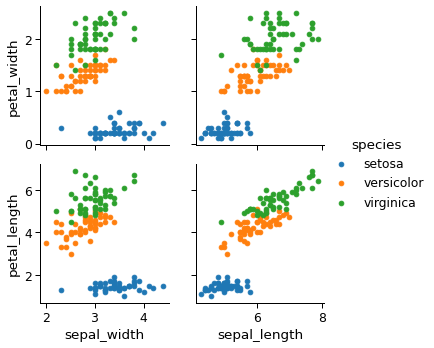

In [55]:
iris= sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species',
                     x_vars=['sepal_width', 'sepal_length'],
                     y_vars=['petal_width', 'petal_length'])
iris_g.map(plt.scatter)
iris_g.add_legend()

# Facet Grid

In [59]:
# allows us to plot multiple plots in a grid in which we will be able to define our columns and rows
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


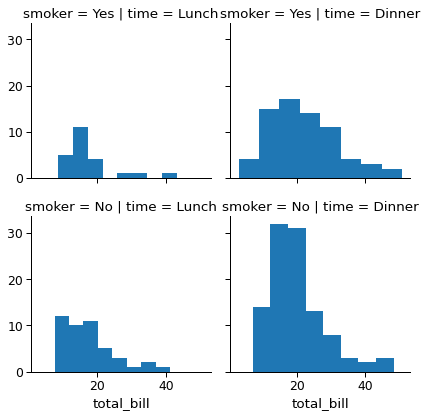

In [62]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=8)

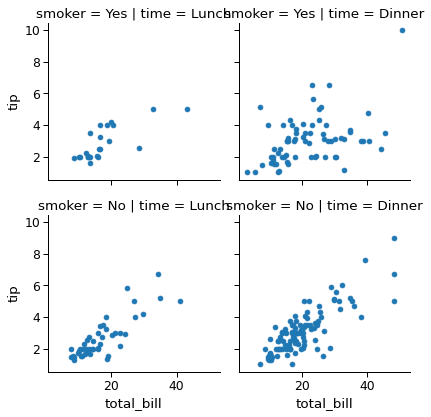

In [63]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.scatter, 'total_bill', 'tip')

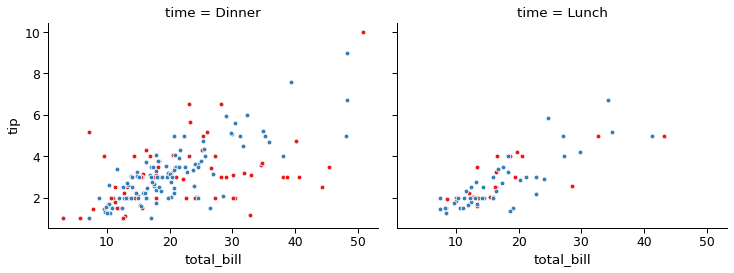

In [64]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
                       col_order = ['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

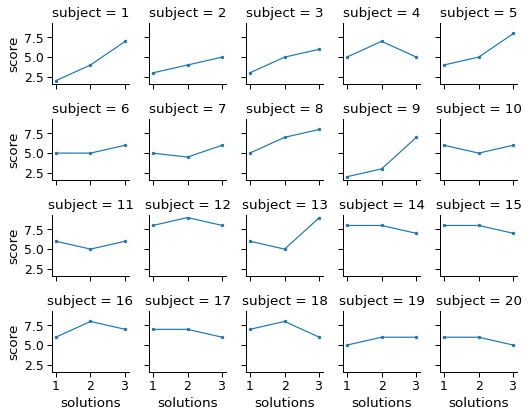

In [65]:
att_df= sns.load_dataset('attention')
att_fg= sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

# Regression Plots

<Figure size 576x432 with 0 Axes>

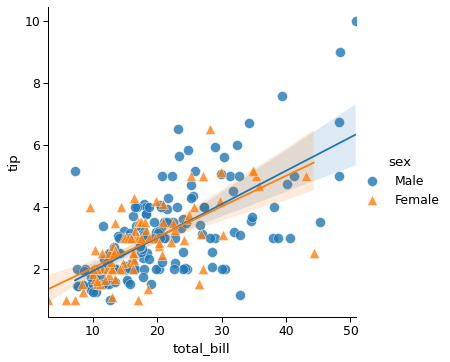

In [68]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o','^'],
          scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'w'})

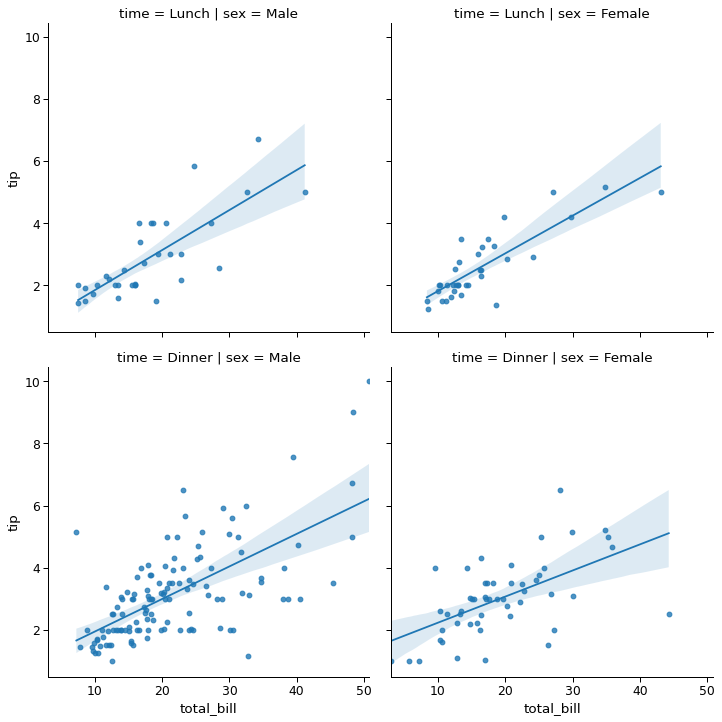

In [69]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)